In [1]:
# all library import
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,id,Age,gender,height,weight,bp_high,bp_lo,cholesterol,gluc,diabetic,smoke,alco,active,cardio
0,0,50,2,168.0,62.0,110.0,80.0,1,1,1,0,0,1,0
1,1,55,1,156.0,85.0,140.0,90.0,3,1,3,0,0,1,1
2,2,52,1,165.0,64.0,130.0,70.0,3,1,3,0,0,0,1
3,3,48,2,169.0,82.0,150.0,100.0,1,1,1,0,0,1,1
4,4,48,1,156.0,56.0,100.0,60.0,1,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   Age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       69975 non-null  float64
 4   weight       69993 non-null  float64
 5   bp_high      69771 non-null  float64
 6   bp_lo        68864 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   diabetic     70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 7.5 MB


In [5]:
df.isnull().head(5)

,id,Age,gender,height,weight,bp_high,bp_lo,cholesterol,gluc,diabetic,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

id                0
Age               0
gender            0
height           25
weight            7
bp_high         229
bp_lo          1136
cholesterol       0
gluc              0
diabetic          0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

In [7]:
# Alcohol intake | Subjective Feature | alco | binary (0, 1)
df.describe()

,id,Age,gender,height,weight,bp_high,bp_lo,cholesterol,gluc,diabetic,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,69975.000000,69993.000000,69771.000000,68864.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.390911,74.211054,127.002781,81.304833,1.366871,1.226457,1.350343,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.009538,14.386312,17.094808,9.357580,0.680250,0.572270,0.714970,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,91.000000,30.000000,70.000000,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,207.000000,200.000000,240.000000,120.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
len(df)

70000

In [9]:
df["alco"].isnull().all()

False

In [10]:
df['alco'].isin([0, 1]).all()

True

In [11]:
df.dropna(subset=['alco'], inplace=True) # Removing rows with missing 'alco' values

In [12]:
len(df)

70000

In [13]:
alco_counts = df['alco'].value_counts()
alco_counts

alco
0    66236
1     3764
Name: count, dtype: int64

In [14]:
alco_counts[0]

66236

In [15]:
alco_counts.values

array([66236,  3764])

[Text(0, 0, '66236'), Text(0, 0, '3764')]

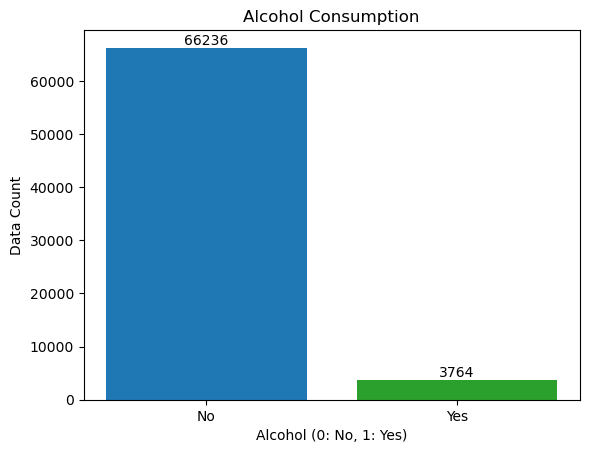

In [16]:
fig, ax = plt.subplots()

bar_labels = ['No', 'Yes']
bar_colors = ['tab:blue', 'tab:green']

bar_container = ax.bar(bar_labels, alco_counts.values, label=bar_labels, color=bar_colors)

ax.set_ylabel('Data Count')
ax.set_xlabel('Alcohol (0: No, 1: Yes)')
ax.set_title('Alcohol Consumption')

ax.bar_label(bar_container)
#plt.savefig('alco_bar.png')